# 使用梯度上升法求解主成分
从一组坐标系转移到另一组坐标系的过程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
# 特征1：0 到 100 之间进行随机分布一共有100个样本
X[:, 0] = np.random.uniform(0., 100., size=100)
# 特征2：与特征1有基本的线性关系，并有一个噪音
X[:, 1] = 0.75*X[:, 0] + 3. + np.random.normal(0, 10, size=100)

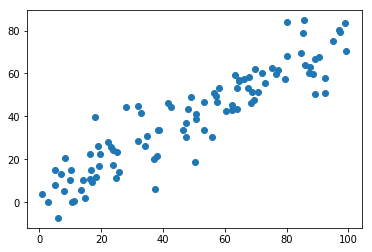

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## demean（将坐标轴移动到中心，简化后续计算）
均值归0化。将坐标轴移动到中心，简化后续计算。

In [4]:
def demean(X):
    # 对矩阵X求每一列的均值
    columns_mean = np.mean(X, axis=0)
    return X - columns_mean

In [5]:
# 将坐标轴移动到中心
X_demean = demean(X)

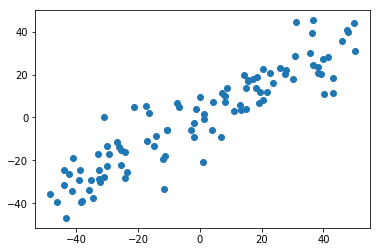

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
# NOTE：数据的相对位置没有改变，但是坐标轴移动了
plt.show()

## 梯度上升法

In [7]:
def f(w, X):
    """目标函数"""
    return np.sum((X.dot(w) ** 2)) / len(X)


def df_math(w, X):
    """求目标函数的梯度"""
    return X.T.dot(X.dot(w)) * 2 / len(X)


def df_debug(w, X, epsilon=0.0001):
    """测试梯度"""
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2*epsilon)
        
    return res

In [8]:
def direction(w):
    """将普通向量转化为单位向量"""
    # np.linalg, numpy的线性代数库
    # np.linalg.norm(w), 取w向量的模
    return w / np.linalg.norm(w)


def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta*gradient
        w = direction(w)    # NOTE: 每次求解w，都要将w化为单位方向向量
        
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        
        cur_iter += 1
    
    return w

In [9]:
# 搜索起始值这里不能使用0作为初始化条件
initial_w = np.random.random(X.shape[1])
initial_w

array([0.88491815, 0.58692075])

In [10]:
eta = 0.001

In [11]:
# 这里不能使用StandardScaler标准化数据，
# 因为StandardScaler会对数据归一化，标准差改变。那么用户的数据会改变
# 最终会导致主成分所求解的坐标轴会和原始的方向不同。


In [12]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.78850729, 0.61502541])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.78850729, 0.61502541])

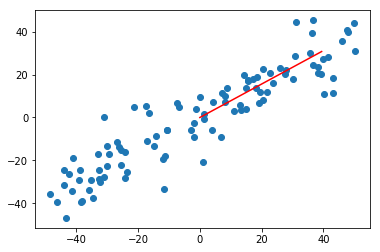

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])

enlarge = 50
plt.plot([0, w[0]*enlarge], [0, w[1]*enlarge], color='r')
plt.show()

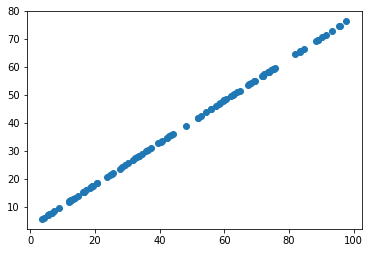

In [15]:
# 没有噪声的案例
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75*X2[:, 0] + 3. 

plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

[0.80000022 0.5999997 ]


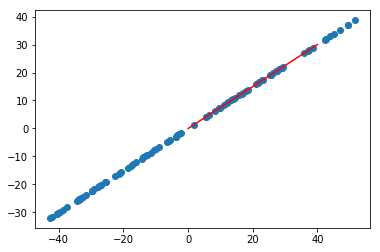

In [16]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
print(w2)
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])

enlarge = 50
plt.plot([0, w2[0]*enlarge], [0, w2[1]*enlarge], color='r')
plt.show()

## 求解前N个主成分


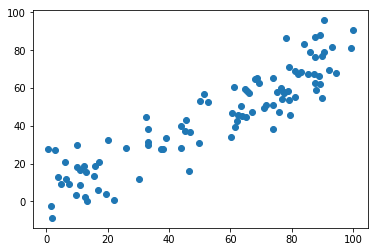

In [17]:
X = np.empty((100, 2))
# 特征1：0 到 100 之间进行随机分布一共有100个样本
X[:, 0] = np.random.uniform(0., 100., size=100)
# 特征2：与特征1有基本的线性关系，并有一个噪音
X[:, 1] = 0.75*X[:, 0] + 3. + np.random.normal(0, 10, size=100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [18]:
def f(w, X):
    """目标函数"""
    return np.sum((X.dot(w) ** 2)) / len(X)


def df(w, X):
    """求目标函数的梯度"""
    return X.T.dot(X.dot(w)) * 2 / len(X)


def direction(w):
    """将普通向量转化为单位向量"""
    # np.linalg, numpy的线性代数库
    # np.linalg.norm(w), 取w向量的模
    return w / np.linalg.norm(w)


def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    """求解给定X样本第一主成分"""
    w = direction(initial_w)
    
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta*gradient
        w = direction(w)    # NOTE: 每次求解w，都要将w化为单位方向向量
        
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        
        cur_iter += 1
    
    return w

In [19]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77329952, 0.63404089])

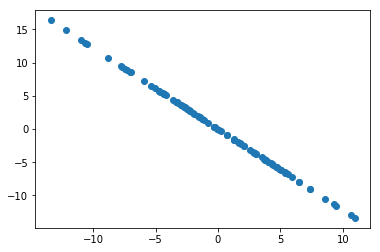

In [20]:
# 求解第二主成分
# 1. 先将第一主成分去掉, 应得到与第一主成分相垂直的向量（正交所以无关）
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w)*w

X2 = X - X.dot(w).reshape(-1, 1)*w
    
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [21]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63403837,  0.77330159])

In [22]:
w.dot(w2)

3.261373700047532e-06

In [23]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    """求对于X样本的前n个主成分"""
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [28]:
ws = first_n_components(2, X)
w1 = ws[0]
w2 = ws[1]
w1.dot(w2)

3.1831108507907047e-06